<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/FeatureEngineering/HandlingMissingData/CompleteCaseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complete case Analysis

### Complete case anaylsis(CCA), also called "list-wise deletion" of cases, consists in discarding obsercations where vlaues in any of the variables are missing.

#### Complete Case Analysis means literally analyzing only those observations for which there is information in all of the variabels in the dataset.

# Advantages:
1. Easy to implement as no data manipulation required
2. Preserves variable distibution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in hte original dataset.)

# Disadvantages:
1. It can exclude a large fraction of the original dataset (if missing data is abundant)
2. Exclude observations could be informative for the analysi (if data is not missing at random)
3. When using our models in production, the model will not know how to handle missing data.

# When to use CCA

1. Data should be MCAR
2. Apply when data is missing in small amount (say 5% only). 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/astrovishalthakur/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
  df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
df.shape

(19158, 13)

In [11]:
# we will apply CCA on data where missing data is less than 5%

cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()>0]

In [12]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
16613,0.624,Full time course,Masters,4.0,74.0
3390,0.884,Part time course,Graduate,15.0,13.0
3734,0.827,no_enrollment,Graduate,20.0,65.0
12229,0.925,Full time course,High School,1.0,83.0
13116,NaN,no_enrollment,Masters,9.0,96.0


In [14]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [15]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

In [28]:
df.columns, new_df.columns

(Index(['enrollee_id', 'city', 'city_development_index', 'gender',
        'relevent_experience', 'enrolled_university', 'education_level',
        'major_discipline', 'experience', 'company_size', 'company_type',
        'training_hours', 'target'],
       dtype='object'),
 Index(['city_development_index', 'enrolled_university', 'education_level',
        'experience', 'training_hours'],
       dtype='object'))

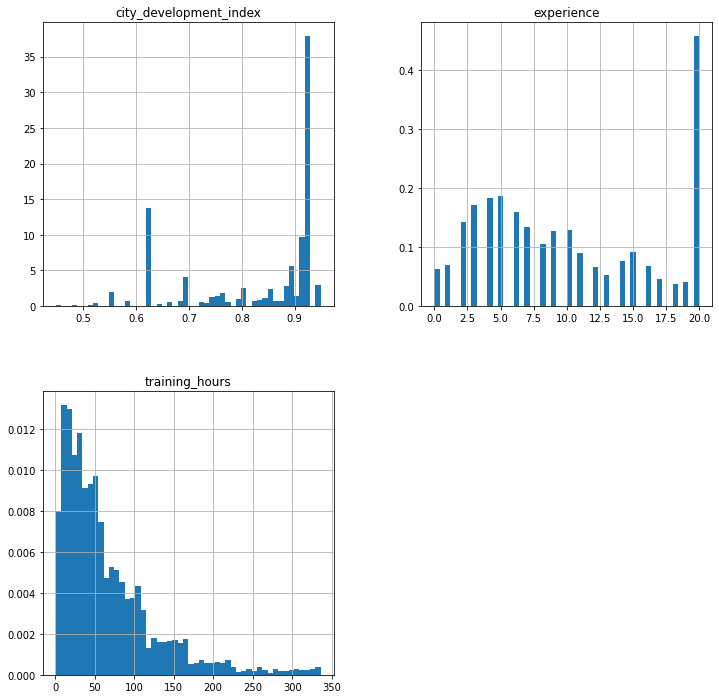

In [17]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

### Before applying CCA, create histogram of numerical data, compare it to histogram of data after applying CCA, if both distributions look simmilar, then its okay to apply CCA, otherwise you mighy wana try something else.

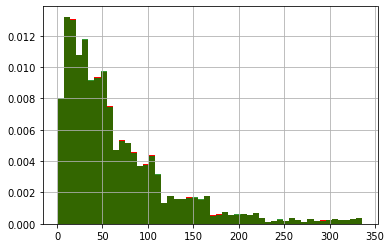

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df.training_hours.hist(bins=50, ax=ax, density=True, color="red")

# data after cca, the argument alpha makes the color transparent, so we can see the overlay of the 2 distributions
new_df.training_hours.hist(bins=50, ax=ax, color="green", density=True, alpha=0.8)

#### As we can see green and red distribution looks so simmilar that they overlap, hence our distribution is not affected drastically after CCA.

same with density plot

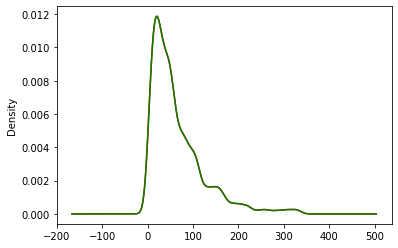

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df.training_hours.plot.density(color="red", ax=ax)

# data after cca, the argument alpha makes the color transparent, so we can see the overlay of the 2 distributions
new_df.training_hours.plot.density(color="green", ax=ax)

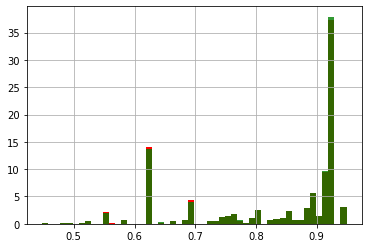

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df.city_development_index.hist(bins=50, ax=ax, density=True, color="red")

# data after cca, the argument alpha makes the color transparent, so we can see the overlay of the 2 distributions
new_df.city_development_index.hist(bins=50, ax=ax, color="green", density=True, alpha=0.8)

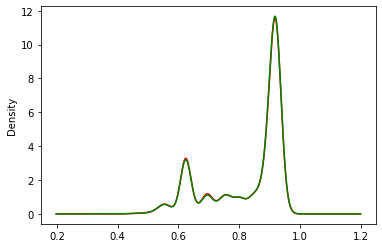

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df.city_development_index.plot.density(color="red", ax=ax)

# data after cca, the argument alpha makes the color transparent, so we can see the overlay of the 2 distributions
new_df.city_development_index.plot.density(color="green", ax=ax)

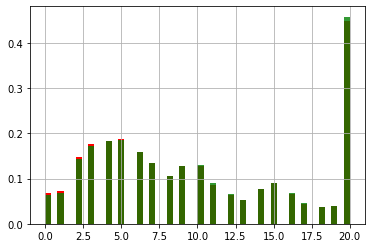

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df.experience.hist(bins=50, ax=ax, density=True, color="red")

# data after cca, the argument alpha makes the color transparent, so we can see the overlay of the 2 distributions
new_df.experience.hist(bins=50, ax=ax, color="green", density=True, alpha=0.8)

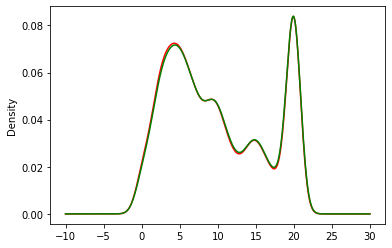

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df.experience.plot.density(color="red", ax=ax)

# data after cca, the argument alpha makes the color transparent, so we can see the overlay of the 2 distributions
new_df.experience.plot.density(color="green", ax=ax)

In [33]:
df.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [34]:
df.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

### Now before applying CCA, we should make sure that proportion of values in each category should remain same before and after the CCA.

In [35]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


as we can see that ratios are mostly similar, so we can perform pca

In [36]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
